# Regression machine learning algorithm steps

## 1. dataset : divide this datasets based on the features like independent and dependent features

## 2. Train the split of the dataset : we can done through this sklearn train test 

## 3. Standardising the dataset:The different units of the features are quickly placing the standardizing the data

## 4. Training the dataset using linear regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

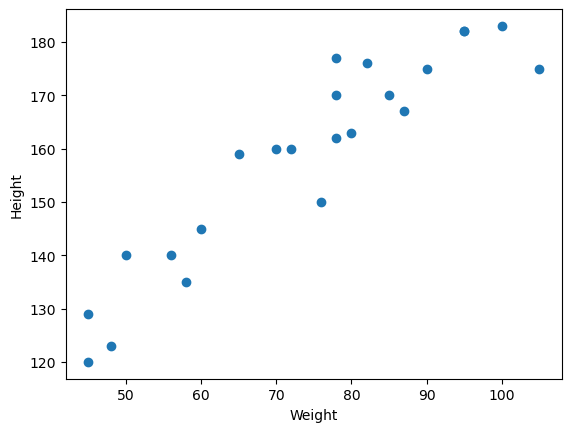

In [4]:
# let's see how it look like in the scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

Divide our dataset into dependent and independent features

In [5]:
x=df[['Weight']]#independent feature
y=df['Height']#dependent feature

In [6]:
x.shape

(23, 1)

In [7]:
y.shape

(23,)

Let's we do train test split of dataset

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

Standardize the dataset train independent data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

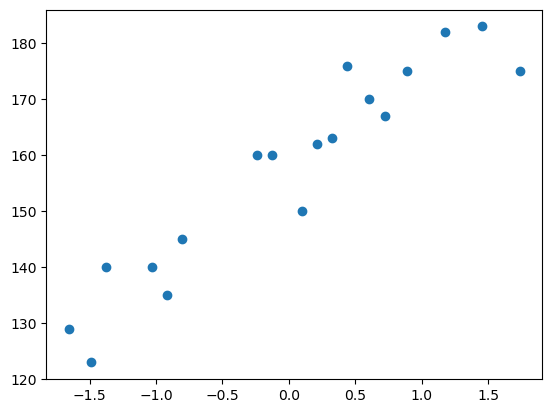

In [14]:
plt.scatter(x_train,y_train)

# let's create a linear regression model

we use sklearn linear regression 
 it's is responsible for the 
    1.Best Fit line
    2.all the slopes of the independent feature

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
regressor=LinearRegression()

In [17]:
regressor.fit(x_train,y_train)
#calculating theta0 and theta1

LinearRegression()

In [18]:
regressor.coef_

array([17.03440872])

In [19]:
regressor.intercept_

157.5

In [20]:
print("The slope or coefficient of the weight is ",regressor.coef_)
print("The interrecept of the line would be",regressor.intercept_)

The slope or coefficient of the weight is  [17.03440872]
The interrecept of the line would be 157.5


Let's create the Best fit line

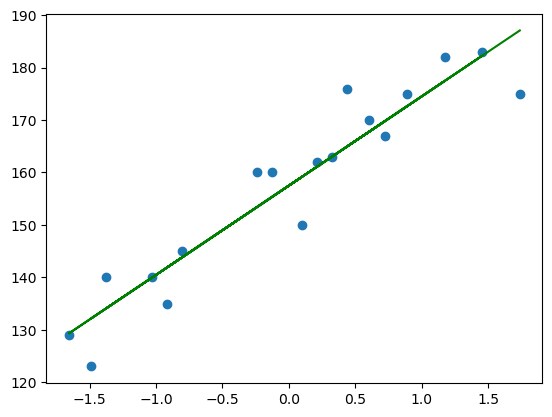

In [21]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'g')

In [22]:
y_pred_test=regressor.predict(x_test)

In [23]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

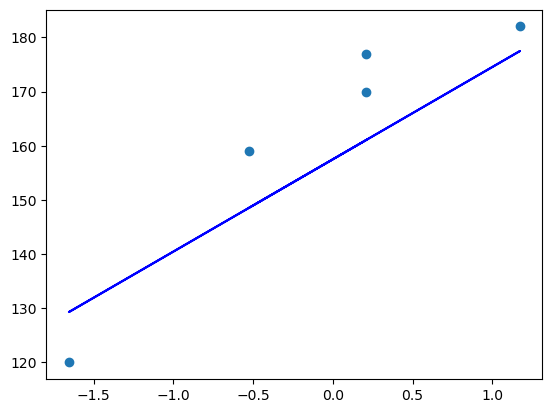

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'b')

In [25]:
y_pred_train=regressor.predict(x_train)

In [26]:
y_pred_train,y_train

(array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
        132.19329381, 177.45645118, 129.3041561 , 143.74984463,
        153.38030364, 159.15857905, 134.11938561, 139.89766102,
        155.30639545, 172.64122168, 164.93685446, 167.82599217,
        169.75208397, 163.01076266]),
 12    175
 1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64)

# Performance Matrix

* MSE - mean squared error
* MAE - mean absolute error
* RMSE- root mean squared error
* R-squared:
* Adjusted R-squared

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mse=mean_squared_error(y_pred_test,y_test)

In [29]:
mae=mean_absolute_error(y_pred_test,y_test)


In [30]:
rmse=np.sqrt(mse)

In [31]:
print(mse,mae,rmse)

109.77592599051654 9.822657814519227 10.477400726827076


# R-Squared Performance matrix

how much this model is accurate

In [32]:
from sklearn.metrics import r2_score

In [33]:
score1=r2_score(y_test,y_pred_test)

In [34]:
score1

0.7769869860423441

In [35]:
score=r2_score(y_train,y_pred_train)

In [36]:
score


0.8930630841011483

# Adjusted R-Squared

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [37]:
#displaying the adjusted r2 data

In [48]:
adj_r2=1-(1-score)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1)

In [49]:
adj_r2

0.8863795268574701

In [50]:
adj_r2_test_data=1-(1-score1)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)

In [51]:
adj_r2_test_data

0.7026493147231254

# Assumptions - Good Model in Regression

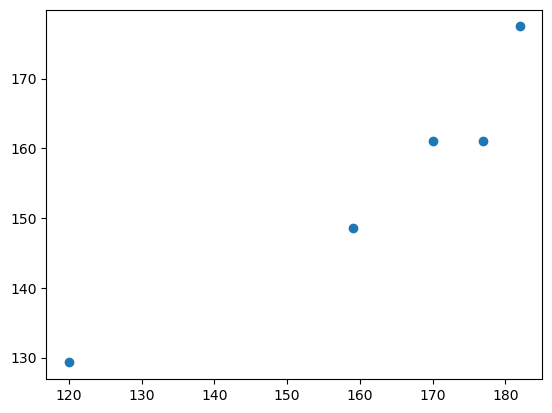

In [53]:
#1...Plot a scatter plot for production

plt.scatter(y_test,y_pred_test)

#the scatter plot is linearly distrubuted then it is a good prediction

In [55]:
#2..Residuals

residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\chand\AppData\Local\Temp\ipykernel_25240\3860108637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

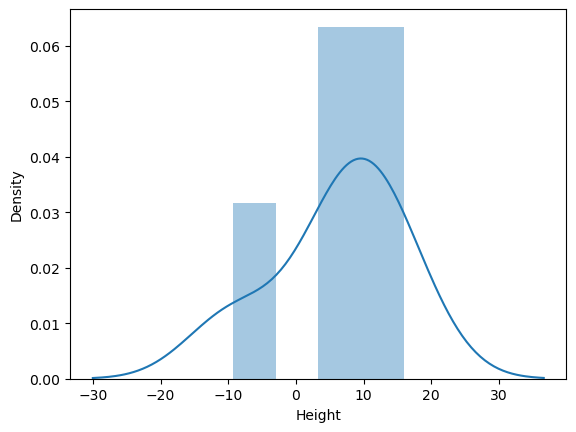

In [56]:
#plotting the residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

<Axes: xlabel='Height', ylabel='Count'>

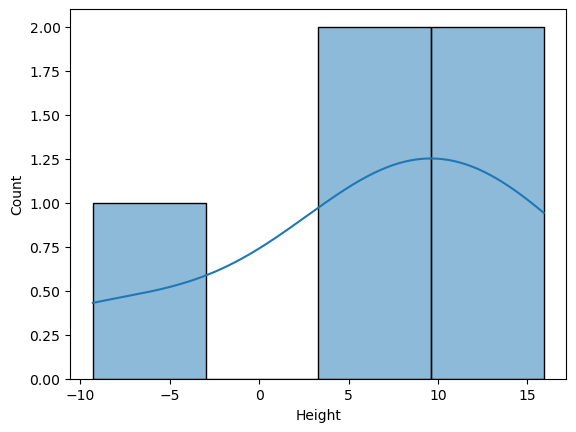

In [58]:
sns.histplot(residuals,kde=True)
#if it is looking like a ranges in the normal distrubution then it is a good prediction

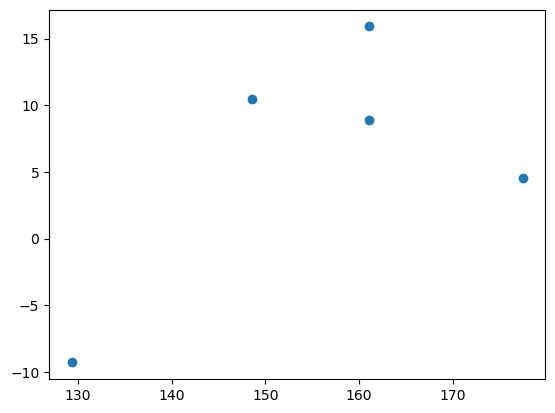

In [59]:
#3...scatter plot with respect to prediction and residuals that must be a uniform distrubution

plt.scatter(y_pred_test,residuals)

<Axes: ylabel='Height'>

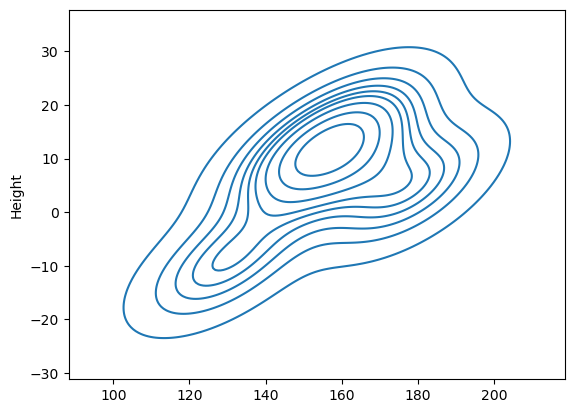

In [62]:
sns.kdeplot(x=y_pred_test, y=residuals)


if we want to save this file in the format of pickle file we are made this in the multiple linear regression
Because the deployment section is came fall under this deployment part